NAME-ROHAN SRIVASTAV <br>
Data Science January Minor Project(2022-23)<br>
SMARTKNOWERS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('credit_card.csv')
df.shape

(8950, 18)

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df['MINIMUM_PAYMENTS'].unique

<bound method Series.unique of 0        139.509787
1       1072.340217
2        627.284787
3               NaN
4        244.791237
           ...     
8945      48.886365
8946            NaN
8947      82.418369
8948      55.755628
8949      88.288956
Name: MINIMUM_PAYMENTS, Length: 8950, dtype: float64>

IMPUTATION

In [6]:
df['MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(axis=0))
df['CREDIT_LIMIT']=df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(axis=0))


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

NORMALISING THE DATA

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df.iloc[:,1:]=sc.fit_transform(df.iloc[:,1:])

In [36]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,C10002,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,C10003,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,C10004,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-4.864523e-16,-0.525551,0.36068
4,C10005,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


CHECKING OR DUPLICATE DATA

In [37]:
df.duplicated().value_counts()

False    8950
dtype: int64

PERFORMING PCA(PRINCIPAL COMPONENT ANALYSIS)

In [49]:
from sklearn.decomposition import PCA
pca=PCA()
z_pca=pca.fit_transform(df.iloc[:,1:])
z_pca.shape

(8950, 17)

In [50]:
cum_var_explained=np.cumsum(pca.explained_variance_ratio_)

In [51]:
cum_var_explained

array([0.27290037, 0.47592029, 0.56384008, 0.63863983, 0.70126775,
       0.75876986, 0.80764221, 0.85021707, 0.88850511, 0.91930517,
       0.94302415, 0.96076047, 0.97502539, 0.98719908, 0.99732898,
       0.99999931, 1.        ])

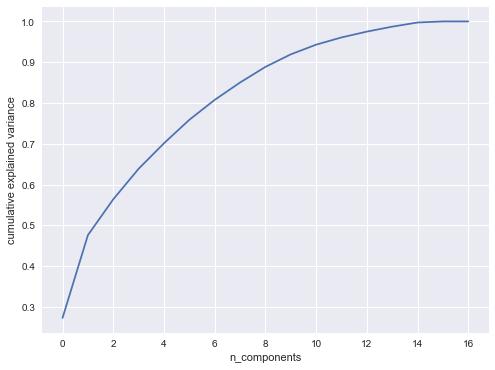

In [52]:
plt.style.use('seaborn')
plt.figure(figsize=(8,6))
plt.plot(cum_var_explained)
plt.xlabel('n_components')
plt.ylabel('cumulative explained variance')
plt.show()

SETTING THE FINAL NUMBER OF PRINCIPAL COMPONENTS TO BE 14

In [55]:
pca=PCA(n_components=13)
z_pca=pca.fit_transform(df.iloc[:,1:])

In [56]:
z_pca.shape

(8950, 13)

APPLYING KMEANS ALGORITHM FROM SKEARN

In [57]:
from sklearn.cluster import KMeans

elbow method to decide the number of clusters

[148350.11280022972, 123986.23471013893, 108232.78407703304, 95289.51902678481, 87731.42189797116, 81077.52860289336, 75755.15091313755, 70720.6325368247, 66124.40576769522, 62751.94194700779, 59928.25869901616, 57680.53789144146, 55527.92957083107, 54193.3679151489, 52212.5056930544, 50662.8524873685, 49762.077420810674, 48417.30870477938]


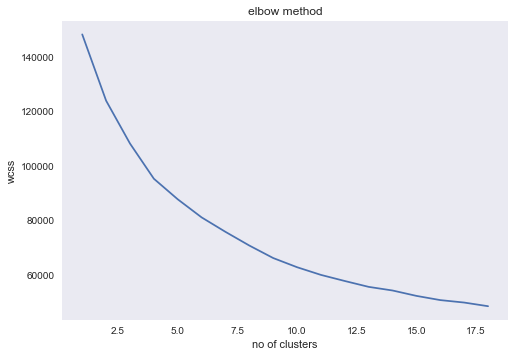

In [58]:
wcss=[]
for i in range(1,19):
    km=KMeans(n_clusters=i)
    km.fit(z_pca)
    wcss.append(km.inertia_)
print(wcss)    
plt.plot(range(1,19),wcss)
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.title('elbow method')
plt.grid()
plt.show()

setting no of cluster to be 4

In [53]:
km=KMeans(n_clusters=4)
km.fit(z_pca)

KMeans(n_clusters=4)

In [54]:
km.cluster_centers_

array([[-1.34162015e+00, -1.85896651e-01,  6.15675815e-01,
         3.10774324e-01,  6.60331009e-02,  1.22038650e-01,
         1.79634380e-01, -1.70175344e-02,  5.76151543e-02,
         9.80323601e-02, -7.85304511e-02, -2.54901050e-02,
        -4.63366540e-02,  5.03406567e-03,  2.11084034e-02,
        -2.25886526e-02,  7.03000348e-06],
       [-4.64464631e-01,  3.52021396e+00, -4.21027857e-01,
        -3.97933582e-01,  3.51432972e-02, -2.35596194e-01,
        -2.82674612e-01,  5.14098741e-03, -5.87262178e-02,
         5.57737450e-02,  1.25821415e-01, -6.43368716e-02,
         9.59548985e-02, -1.70209364e-02, -6.70546609e-02,
         1.87707234e-02,  3.77020247e-05],
       [ 9.58387566e-01, -1.11137471e+00, -6.96528152e-01,
        -2.74588646e-01, -1.11959947e-01, -1.32606134e-01,
        -1.60046429e-01,  4.12404650e-02, -5.25367425e-02,
        -1.98222299e-01,  5.67460198e-02,  9.32192702e-02,
         4.68802298e-02, -1.50366434e-03, -5.88447436e-03,
         2.85511938e-02, -5.0